## Engr421
### Homework 6
#### Ata Sayın, 64437

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as spa
from scipy.stats import multivariate_normal

In [2]:
np.random.seed(421)
class_means = np.array([[+2.5, +2.5], 
                        [-2.5, +2.5],
                        [-2.5, -2.5],
                        [+2.5, -2.5],
                        [0,       0]
                       ])

class_covariances = np.array([[[+0.8, -0.6], 
                               [-0.6, +0.8]],
                              
                              [[+0.8, +0.6], 
                               [+0.6, +0.8]],
                              
                              [[+0.8, -0.6], 
                               [-0.6, +0.8]],
                              
                              [[+0.8, +0.6], 
                               [+0.6, +0.8]],
                              
                              [[1.6,   0   ],
                               [0,     1.6]]
                             ])

class_sizes = np.array([50,50,50,50,100])

In [3]:
points1 = np.random.multivariate_normal(class_means[0,:], class_covariances[0,:,:], class_sizes[0])
points2 = np.random.multivariate_normal(class_means[1,:], class_covariances[1,:,:], class_sizes[1])
points3 = np.random.multivariate_normal(class_means[2,:], class_covariances[2,:,:], class_sizes[2])
points4 = np.random.multivariate_normal(class_means[3,:], class_covariances[3,:,:], class_sizes[3])
points5 = np.random.multivariate_normal(class_means[4,:], class_covariances[4,:,:], class_sizes[4])

X = np.vstack((points1, points2, points3, points4, points5))

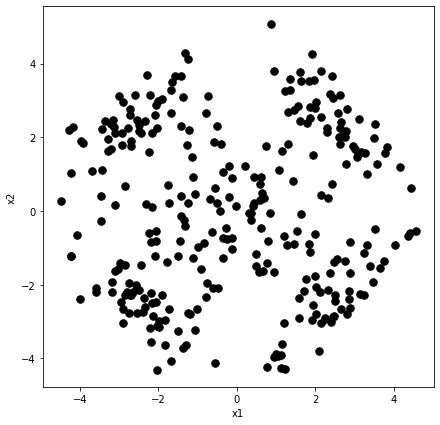

In [4]:
plt.figure(figsize=(7,7))
plt.plot(X[:,0],X[:,1],"k.", markersize = 15)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [5]:
def update_centroids(memberships, X):
    if memberships is None:
        centroids = X[np.random.choice(range(N), K),:]
    else:
        centroids = np.vstack([np.mean(X[memberships == k,], axis = 0) for k in range(K)])
    return(centroids)

def update_memberships(centroids, X):
    D = spa.distance_matrix(centroids, X)
    memberships = np.argmin(D, axis = 0)
    return(memberships)

#### K_Means

In [6]:
centroids = None
memberships = None
iteration = 1
N=np.sum(class_sizes)
K=5
D=2
for x in range(2):
    centroids = update_centroids(memberships, X)   
    
    memberships = update_memberships(centroids, X)


In [10]:
memberships.shape

(300,)

In [8]:
#one_hot 
Z = np.zeros((N, K)).astype(int)
Z.shape

(300, 5)

In [9]:
Z[range(N), memberships] = 1
Z.shape

(300, 5)

In [371]:
#K_means initial values 
sample_mean=centroids
sample_covariance=np.array([np.cov(X[Z[:,h]==1],rowvar=False) for h in range(K)])
sample_prior=np.mean(Z,axis=0)
likelihood=np.array([multivariate_normal.pdf(X, mean=sample_mean[k], cov=sample_covariance[k])*sample_prior[k] for k in range(K)])
H=np.array([likelihood[k]/(np.sum(likelihood,axis=0)) for k in range(K)])
    

In [372]:
#Valid probability estimator
sum([H>=0]).shape
np.sum(H,axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [373]:
def e_step(sample_mean,sample_covariance,sample_prior):
    
    likelihood=np.array([multivariate_normal.pdf(X, mean=sample_mean[k], cov=sample_covariance[k])*sample_prior[k] for k in range(K)])
    H=np.array([likelihood[k]/(np.sum(likelihood,axis=0)) for k in range(K)])
    return H

def m_step(H):
    #mean
    all_sample_mean=np.array([np.dot(H[k,:],X)/np.sum(H[k,:]) for k in range(K)])
    
    #cov
    all_sample_covariance=[]
    for k in range(K):
        sum_cov=np.array((2,2))
        for i in range(N):
            el=H[k][i]*(np.dot((X[i]-all_sample_mean[k]).reshape(2,1),(X[i]-all_sample_mean[k]).reshape(2,1).T))
            sum_cov=sum_cov+el
        
        all_sample_covariance=np.append(all_sample_covariance,sum_cov/np.sum(H[k,:]))

    all_sample_covariance=all_sample_covariance.reshape(5,2,2)   

    #prior
    all_sample_prior=np.mean(H,axis=1)    

    likelihood=np.array([multivariate_normal.pdf(X, mean=sample_mean[k], cov=sample_covariance[k])*sample_prior[k] for k in range(K)])
    p=np.array([likelihood[k]/(np.sum(likelihood,axis=0)) for k in range(K)])

    parameter=np.argmax(p,axis=0)

    new_sample_mean=all_sample_mean[parameter]
    new_sample_covariance=all_sample_covariance[parameter]
    new_sample_prior=all_sample_prior[parameter]
    
    return(all_sample_mean,all_sample_covariance,all_sample_prior,parameter)

In [374]:
iteration=1
#K_means initial values 
sample_mean=centroids
sample_covariance=np.array([np.cov(X[Z[:,h]==1],rowvar=False) for h in range(K)])
sample_prior=np.mean(Z,axis=0)

while True:
    iteration=iteration+1
    H=e_step(sample_mean,sample_covariance,sample_prior)
    
    sample_mean,sample_covariance,sample_prior,parameter=m_step(H)
       
    if (iteration==100):
        break